***DMAPS – HPMA, dp_corona=38, salt = 0, pH = 7, charged = 1 and T = 70 C; conc = [10 - 25] and dp_core = [115 - 403] (47 experimental data)

In [1]:
import data1 as data
import random
query = (data.x.core_HPMA == 1) & (data.x.corona_GMA == 1) & (data.x.dp_corona==78) & (data.x.ph==7) & (data.x.salt==0) & (data.x.charged==0) & (data.x.temp==70)
points = data.x[query]
def split_train_test(frac, points=points, seed = None, datax = data.x, datay = data.y):
    frac = 1- frac
    test_index = points.sample(frac=frac, random_state=seed).index
    X_train = datax[~datax.index.isin(test_index)]
    #X_train = datax(test_index) try this
    X_test = datax[datax.index.isin(test_index)]
    y_train = datay[~datay.index.isin(test_index)]
    y_test = datay[datay.index.isin(test_index)]
    train_index = [each for each in points.index.tolist() if each not in X_test.index.tolist()]
    print(train_index)
    return X_train, X_test, y_train, y_test

In [2]:
X_train, X_test, y_train, y_test = split_train_test(frac = 0.1, seed=1)

[506, 507, 510, 535]


In [3]:
#X_train, X_test, y_train, y_test = split_train_test(frac = 0.1, seed=1)

In [4]:
#X_train, X_test, y_train, y_test = split_train_test(frac = 0.1, seed=2)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_sphere = RandomForestClassifier().fit(X_train, y_train.sphere) #random_state = seed 
rf_worm = RandomForestClassifier().fit(X_train, y_train.worm)
rf_vesicle = RandomForestClassifier().fit(X_train, y_train.vesicle)

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import numpy as np

y_pred_sphere = rf_sphere.predict(X_test)
print(y_pred_sphere)
print(y_test.sphere)
#y_test.sphere.value_counts()

metrics.accuracy_score(y_test.sphere, y_pred_sphere)
confusion_matrix(y_test.sphere, y_pred_sphere)

tn, fp, fn, tp = confusion_matrix(y_test.sphere, y_pred_sphere).ravel()
print(tn, fp, fn, tp)
acc_score_sphere = (tn+tp) / float(tn+fp+fn+tp)
misclass_sphere = (fn+fp) / float(tn+fp+fn+tp)
TPR_sphere = (tp) / float(fn+tp)
precision_sphere = (tp) / float(fp+tp)

#print(confusion_matrix)
#print(metrics.accuracy_score)

print(f'accuracy score_RF_Sphere = {acc_score_sphere}')
print(f'misclassification rate_RF_Sphere = {misclass_sphere}')
print(f'true positive rate_RF_Sphere = {TPR_sphere}')
print(f'precision_RF_Sphere = {precision_sphere}')

###########################################################################

y_pred_worm = rf_worm.predict(X_test)
metrics.accuracy_score(y_test.worm, y_pred_worm)
confusion_matrix(y_test.worm, y_pred_worm)

tn, fp, fn, tp = confusion_matrix(y_test.worm, y_pred_worm).ravel()
print(tn, fp, fn, tp)
acc_score_worm = (tn+tp) / float(tn+fp+fn+tp)
misclass_worm = (fn+fp) / float(tn+fp+fn+tp)
TPR_worm = (tp) / float(fn+tp)
precision_worm = (tp) / float(fp+tp)

#print(confusion_matrix)
#print(metrics.accuracy_score)

print(f'accuracy score_RF_Worm = {acc_score_worm}')
print(f'misclassification rate_RF_Worm = {misclass_worm}')
print(f'true positive rate_RF_Worm = {TPR_worm}')
print(f'precision_RF_Worm = {precision_worm}')

###########################################################################

y_pred_vesicle = rf_vesicle.predict(X_test)
metrics.accuracy_score(y_test.vesicle, y_pred_vesicle)
confusion_matrix(y_test.vesicle, y_pred_vesicle)

tn, fp, fn, tp = confusion_matrix(y_test.vesicle, y_pred_vesicle).ravel()
print(tn, fp, fn, tp)
acc_score_vesicle = (tn+tp) / float(tn+fp+fn+tp)
misclass_vesicle = (fn+fp) / float(tn+fp+fn+tp)
TPR_vesicle = (tp) / float(fn+tp)
precision_vesicle = (tp) / float(fp+tp)

#print(confusion_matrix)
#print(metrics.accuracy_score)

print(f'accuracy score_RF_Vesicle = {acc_score_vesicle}')
print(f'misclassification rate_RF_Vesicle = {misclass_vesicle}')
print(f'true positive rate_RF_Vesicle = {TPR_vesicle}')
print(f'precision_RF_Vesicle = {precision_vesicle}')


[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1]
Entry no
498    1
499    1
500    1
501    1
502    1
503    1
504    1
505    1
508    1
509    1
511    1
512    1
513    1
514    1
515    1
516    1
517    1
518    1
519    1
520    1
521   -1
522   -1
523   -1
524   -1
525   -1
526   -1
527   -1
528    1
529   -1
530   -1
531   -1
532    1
533    1
534    1
536   -1
537   -1
538   -1
539   -1
540   -1
541   -1
Name: sphere, dtype: int64
1 15 2 22
accuracy score_RF_Sphere = 0.575
misclassification rate_RF_Sphere = 0.425
true positive rate_RF_Sphere = 0.9166666666666666
precision_RF_Sphere = 0.5945945945945946
16 3 8 13
accuracy score_RF_Worm = 0.725
misclassification rate_RF_Worm = 0.275
true positive rate_RF_Worm = 0.6190476190476191
precision_RF_Worm = 0.8125
21 2 8 9
accuracy score_RF_Vesicle = 0.75
misclassification rate_RF_Vesicle = 0.25
true positive rate_RF_Vesicle = 0.5294117647058824
precision_RF_Vesi

TPR: 0.9166666666666666
FPR: 0.0


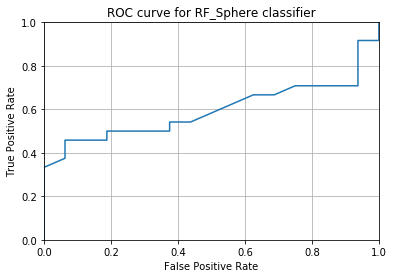

In [7]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

y_pred_prob = rf_sphere.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(y_test.sphere, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for RF_Sphere classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

def evaluate_threshold(threshold):
    print ('TPR:', tpr[thresholds > threshold][-1])
    print ('FPR:', 1 - fpr[thresholds > threshold][-1])
    
evaluate_threshold(0.3)

In [8]:
# from sklearn.tree import DecisionTreeClassifier

# dt_sphere = DecisionTreeClassifier().fit(X_train, y_train.sphere)
# dt_worm = DecisionTreeClassifier().fit(X_train, y_train.worm)
# dt_vesicle = DecisionTreeClassifier().fit(X_train, y_train.vesicle)

In [9]:
from gam import LogisticGAM

#gam_sphere = LogisticGAM(lam=[5]*len(X_train.columns), max_iter=200).fit(X_train, y_train.sphere.replace(-1, 0))
#gam_worm = LogisticGAM(lam=[7]*len(X_train.columns), max_iter=200).fit(X_train, y_train.worm.replace(-1, 0))
#gam_vesicle = LogisticGAM(lam=[6]*len(X_train.columns), max_iter=200).fit(X_train, y_train.vesicle.replace(-1, 0))

In [10]:

#y_pred_sphere = gam_sphere.predict(X_test)
#y_pred_sphere[y_pred_sphere==0] = -1

#metrics.accuracy_score(y_test.sphere, y_pred_sphere)
#cf = confusion_matrix(y_test.sphere, y_pred_sphere)

# tn, fp, fn, tp = confusion_matrix(y_test.sphere, y_pred_sphere).ravel()
# print(tn, fp, fn, tp)
# acc_score_sphere = (tn+tp) / float(tn+fp+fn+tp)
# misclass_sphere = (fn+fp) / float(tn+fp+fn+tp)
# TPR_sphere = (tp) / float(fn+tp)
# precision_sphere = (tp) / float(fp+tp)

#print(cf)
#print(metrics.accuracy_score)

# print(f'accuracy score_GAM_Sphere = {acc_score_sphere}')
# print(f'misclassification rate_GAM_Sphere = {misclass_sphere}')
# print(f'true positive rate_GAM_Sphere = {TPR_sphere}')
# print(f'precision_GAM_Sphere = {precision_sphere}')

###########################################################################

#y_pred_worm = gam_worm.predict(X_test)
#metrics.accuracy_score(y_test.worm, y_pred_worm)
#confusion_matrix(y_test.worm, y_pred_worm)

# tn, fp, fn, tp = confusion_matrix(y_test.worm, y_pred_worm).ravel()
# print(tn, fp, fn, tp)
# acc_score_worm = (tn+tp) / float(tn+fp+fn+tp)
# misclass_worm = (fn+fp) / float(tn+fp+fn+tp)
# TPR_worm = (tp) / float(fn+tp)
# precision_worm = (tp) / float(fp+tp)

#print(confusion_matrix)
#print(metrics.accuracy_score)

# print(f'accuracy score_GAM_Worm = {acc_score_worm}')
# print(f'misclassification rate_GAM_Worm = {misclass_worm}')
# print(f'true positive rate_GAM_Worm = {TPR_worm}')
# print(f'precision_GAM_Worm = {precision_worm}')

###########################################################################

#y_pred_vesicle = gam_vesicle.predict(X_test)
#metrics.accuracy_score(y_test.vesicle, y_pred_vesicle)
#confusion_matrix(y_test.vesicle, y_pred_vesicle)

# tn, fp, fn, tp = confusion_matrix(y_test.vesicle, y_pred_vesicle).ravel()
# print(tn, fp, fn, tp)
# acc_score_vesicle = (tn+tp) / float(tn+fp+fn+tp)
# misclass_vesicle = (fn+fp) / float(tn+fp+fn+tp)
# TPR_vesicle = (tp) / float(fn+tp)
# precision_vesicle = (tp) / float(fp+tp)

#print(confusion_matrix)
#print(metrics.accuracy_score)

# print(f'accuracy score_GAM_Vesicle = {acc_score_vesicle}')
# print(f'misclassification rate_GAM_Vesicle = {misclass_vesicle}')
# print(f'true positive rate_GAM_Vesicle = {TPR_vesicle}')
# print(f'precision_GAM_Vesicle = {precision_vesicle}')


In [11]:
from sklearn.linear_model import LogisticRegressionCV
lr_sphere = LogisticRegressionCV(penalty='l1', solver='saga', verbose=0).fit(X_train, y_train.sphere)
lr_worm = LogisticRegressionCV(penalty='l1', solver='saga', verbose=0).fit(X_train, y_train.worm)
lr_vesicle = LogisticRegressionCV(penalty='l1', solver='saga', verbose=0).fit(X_train, y_train.vesicle)

C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_

C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_

C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_

C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\YAL002\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_

In [12]:
prototype = X_test.iloc[0]

import numpy as np

xx = np.linspace(6, 28, 200)
yy = np.linspace(120, 530, 200)
xx, yy = np.meshgrid(xx, yy, indexing='xy')

grid_points = data.x_grid_data(prototype, xx, yy)

zz_rf_s = rf_sphere.predict_proba(grid_points)[:, 1].reshape(xx.shape)
zz_rf_w = rf_worm.predict_proba(grid_points)[:, 1].reshape(xx.shape)
zz_rf_v = rf_vesicle.predict_proba(grid_points)[:, 1].reshape(xx.shape)

# zz_dt_s = dt_sphere.predict_proba(grid_points)[:, 1].reshape(xx.shape)
# zz_dt_w = dt_worm.predict_proba(grid_points)[:, 1].reshape(xx.shape)
# zz_dt_v = dt_vesicle.predict_proba(grid_points)[:, 1].reshape(xx.shape)

#zz_gam_s = gam_sphere.predict_proba(grid_points)[:, 1].reshape(xx.shape)
#zz_gam_w = gam_worm.predict_proba(grid_points)[:, 1].reshape(xx.shape)
#zz_gam_v = gam_vesicle.predict_proba(grid_points)[:, 1].reshape(xx.shape)

zz_lr_s = lr_sphere.predict_proba(grid_points)[:, 1].reshape(xx.shape)
zz_lr_w = lr_worm.predict_proba(grid_points)[:, 1].reshape(xx.shape)
zz_lr_v = lr_vesicle.predict_proba(grid_points)[:, 1].reshape(xx.shape)


#print(rf_sphere.predict_proba(grid_points))
#print(dt_sphere.predict_proba(grid_points))

C:\Users\YAL002\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


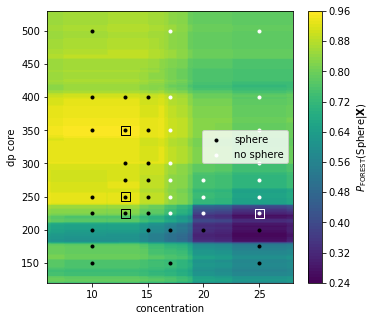

C:\Users\YAL002\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


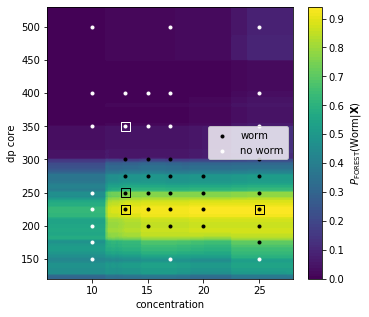

C:\Users\YAL002\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


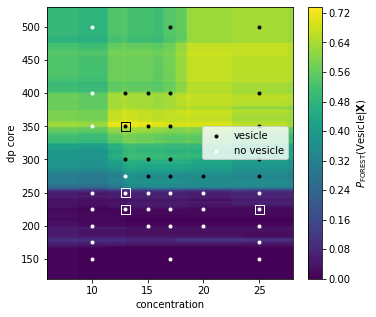

In [13]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(5.5,5))
cp = plt.contourf(xx, yy, zz_rf_s, levels=100)
x = points['conc']
y = points['dp_core']

plt.scatter(x[data.sphere==1], y[data.sphere==1], marker='.', color='black', label='sphere')
plt.scatter(x[data.sphere!=1], y[data.sphere!=1], marker='.', color='white', label='no sphere')

points_inc = X_train[query]
x1 = points_inc['conc']
y1 = points_inc['dp_core']
# plt.scatter(x1, y1, facecolor='white', edgecolors='black', marker='s', s=100)
plt.scatter(x1[data.sphere==1], y1[data.sphere==1], facecolor='none', edgecolors='black', marker='s', s=80)
plt.scatter(x1[data.sphere!=1], y1[data.sphere!=1], facecolor='none', edgecolors='white', marker='s', s=80)

plt.xlabel('concentration')
plt.ylabel('dp core')
plt.legend()
plt.colorbar(cp, label=r'$P_\mathrm{FOREST}(\mathrm{Sphere | \mathbf{X}})$')
plt.show()

#########################################################
plt.figure(figsize=(5.5,5))
cp = plt.contourf(xx, yy, zz_rf_w, levels=100)
x = points['conc']
y = points['dp_core']

plt.scatter(x[data.worm==1], y[data.worm==1], marker='.', color='black', label='worm')
plt.scatter(x[data.worm!=1], y[data.worm!=1], marker='.', color='white', label='no worm')

points_inc = X_train[query]
x1 = points_inc['conc']
y1 = points_inc['dp_core']
# plt.scatter(x1, y1, facecolor='none', edgecolors='black', marker='s', s=100)
plt.scatter(x1[data.worm==1], y1[data.worm==1], facecolor='none', edgecolors='black', marker='s', s=80)
plt.scatter(x1[data.worm!=1], y1[data.worm!=1], facecolor='none', edgecolors='white', marker='s', s=80)

plt.xlabel('concentration')
plt.ylabel('dp core')
plt.legend()
plt.colorbar(cp, label=r'$P_\mathrm{FOREST}(\mathrm{Worm | \mathbf{X}})$')
plt.show()

##########################################################
plt.figure(figsize=(5.5,5))
cp = plt.contourf(xx, yy, zz_rf_v, levels=100)
x = points['conc']
y = points['dp_core']

plt.scatter(x[data.vesicle==1], y[data.vesicle==1], marker='.', color='black', label='vesicle')
plt.scatter(x[data.vesicle!=1], y[data.vesicle!=1], marker='.', color='white', label='no vesicle')

points_inc = X_train[query]
x1 = points_inc['conc']
y1 = points_inc['dp_core']
# plt.scatter(x1, y1, facecolor='none', edgecolors='white', marker='s', s=100)
plt.scatter(x1[data.vesicle==1], y1[data.vesicle==1], facecolor='none', edgecolors='black', marker='s', s=80)
plt.scatter(x1[data.vesicle!=1], y1[data.vesicle!=1], facecolor='none', edgecolors='white', marker='s', s=80)

plt.xlabel('concentration')
plt.ylabel('dp core')
plt.legend()
plt.colorbar(cp, label=r'$P_\mathrm{FOREST}(\mathrm{Vesicle | \mathbf{X}})$')
plt.show()

In [14]:
# plt.figure(figsize=(5.5,5))
# cp = plt.contourf(xx, yy, zz_dt_s, levels=100)
# x = points['conc']
# y = points['dp_core']

# plt.scatter(x[data.sphere==1], y[data.sphere==1], marker='.', color='black', label='sphere')
# plt.scatter(x[data.sphere!=1], y[data.sphere!=1], marker='.', color='white', label='no sphere')

# points_inc = X_train[query]
# x1 = points_inc['conc']
# y1 = points_inc['dp_core']
# # plt.scatter(x1, y1, facecolor='white', edgecolors='black', marker='s', s=100)
# plt.scatter(x1[data.sphere==1], y1[data.sphere==1], facecolor='none', edgecolors='black', marker='s', s=80)
# plt.scatter(x1[data.sphere!=1], y1[data.sphere!=1], facecolor='none', edgecolors='white', marker='s', s=80)


# plt.xlabel('concentration')
# plt.ylabel('dp core')
# plt.legend()
# plt.colorbar(cp, label=r'$P_\mathrm{DECISION}(\mathrm{Sphere | \mathbf{X}})$')
# plt.show()

# #########################################################
# plt.figure(figsize=(5.5,5))
# cp = plt.contourf(xx, yy, zz_dt_w, levels=100)
# x = points['conc']
# y = points['dp_core']

# plt.scatter(x[data.worm==1], y[data.worm==1], marker='.', color='black', label='worm')
# plt.scatter(x[data.worm!=1], y[data.worm!=1], marker='.', color='white', label='no worm')

# points_inc = X_train[query]
# x1 = points_inc['conc']
# y1 = points_inc['dp_core']
# # plt.scatter(x1, y1, facecolor='white', edgecolors='black', marker='s', s=100)
# plt.scatter(x1[data.worm==1], y1[data.worm==1], facecolor='none', edgecolors='black', marker='s', s=80)
# plt.scatter(x1[data.worm!=1], y1[data.worm!=1], facecolor='none', edgecolors='white', marker='s', s=80)
    
# plt.xlabel('concentration')
# plt.ylabel('dp core')
# plt.legend()
# plt.colorbar(cp, label=r'$P_\mathrm{DECISION}(\mathrm{Worm | \mathbf{X}})$')
# plt.show()

# ##########################################################
# plt.figure(figsize=(5.5,5))
# cp = plt.contourf(xx, yy, zz_dt_v, levels=100)
# x = points['conc']
# y = points['dp_core']

# plt.scatter(x[data.vesicle==1], y[data.vesicle==1], marker='.', color='black', label='vesicle')
# plt.scatter(x[data.vesicle!=1], y[data.vesicle!=1], marker='.', color='white', label='no vesicle')

# points_inc = X_train[query]
# x1 = points_inc['conc']
# y1 = points_inc['dp_core']
# # plt.scatter(x1, y1, facecolor='white', edgecolors='black', marker='s', s=100)
# plt.scatter(x1[data.vesicle==1], y1[data.vesicle==1], facecolor='none', edgecolors='black', marker='s', s=80)
# plt.scatter(x1[data.vesicle!=1], y1[data.vesicle!=1], facecolor='none', edgecolors='white', marker='s', s=80)
    
# plt.xlabel('concentration')
# plt.ylabel('dp core')
# plt.legend()
# plt.colorbar(cp, label=r'$P_\mathrm{DECISION}(\mathrm{Vesicle | \mathbf{X}})$')
# plt.show()

In [15]:
#plt.figure(figsize=(5.5,5))
#cp = plt.contourf(xx, yy, zz_gam_s, levels=100)
#x = points['conc']
#y = points['dp_core']

#plt.scatter(x[data.sphere==1], y[data.sphere==1], marker='.', color='black', label='sphere')
#plt.scatter(x[data.sphere!=1], y[data.sphere!=1], marker='.', color='white', label='no sphere')

#points_inc = X_train[query]
#x1 = points_inc['conc']
#y1 = points_inc['dp_core']
# plt.scatter(x1, y1, facecolor='white', edgecolors='black', marker='s', s=100)
#plt.scatter(x1[data.sphere==1], y1[data.sphere==1], facecolor='none', edgecolors='black', marker='s', s=80)
#plt.scatter(x1[data.sphere!=1], y1[data.sphere!=1], facecolor='none', edgecolors='white', marker='s', s=80)
    
#plt.xlabel('concentration')
#plt.ylabel('dp core')
#plt.legend()
#plt.colorbar(cp, label=r'$P_\mathrm{GAM}(\mathrm{Sphere | \mathbf{X}})$')
#plt.show()

#########################################################
#plt.figure(figsize=(5.5,5))
#cp = plt.contourf(xx, yy, zz_gam_w, levels=100)
#x = points['conc']
#y = points['dp_core']

#plt.scatter(x[data.worm==1], y[data.worm==1], marker='.', color='black', label='worm')
#plt.scatter(x[data.worm!=1], y[data.worm!=1], marker='.', color='white', label='no worm')

#points_inc = X_train[query]
#x1 = points_inc['conc']
#y1 = points_inc['dp_core']
# plt.scatter(x1, y1, facecolor='white', edgecolors='black', marker='s', s=100)
#plt.scatter(x1[data.worm==1], y1[data.worm==1], facecolor='none', edgecolors='black', marker='s', s=80)
#plt.scatter(x1[data.worm!=1], y1[data.worm!=1], facecolor='none', edgecolors='white', marker='s', s=80)
    
#plt.xlabel('concentration')
#plt.ylabel('dp core')
#plt.legend()
#plt.colorbar(cp, label=r'$P_\mathrm{GAM}(\mathrm{Worm | \mathbf{X}})$')
#plt.show()

##########################################################
#plt.figure(figsize=(5.5,5))
#cp = plt.contourf(xx, yy, zz_gam_v, levels=100)
#x = points['conc']
#y = points['dp_core']

#plt.scatter(x[data.vesicle==1], y[data.vesicle==1], marker='.', color='black', label='vesicle')
#plt.scatter(x[data.vesicle!=1], y[data.vesicle!=1], marker='.', color='white', label='no vesicle')

#points_inc = X_train[query]
#x1 = points_inc['conc']
#y1 = points_inc['dp_core']
# plt.scatter(x1, y1, facecolor='white', edgecolors='black', marker='s', s=100)
#plt.scatter(x1[data.vesicle==1], y1[data.vesicle==1], facecolor='none', edgecolors='black', marker='s', s=80)
#plt.scatter(x1[data.vesicle!=1], y1[data.vesicle!=1], facecolor='none', edgecolors='white', marker='s', s=80)
    
#plt.xlabel('concentration')
#plt.ylabel('dp core')
#plt.legend()
#plt.colorbar(cp, label=r'$P_\mathrm{GAM}(\mathrm{Vesicle | \mathbf{X}})$')
#plt.show()

C:\Users\YAL002\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


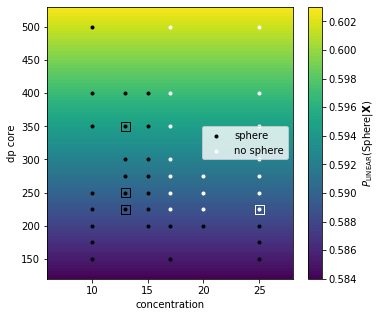

C:\Users\YAL002\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


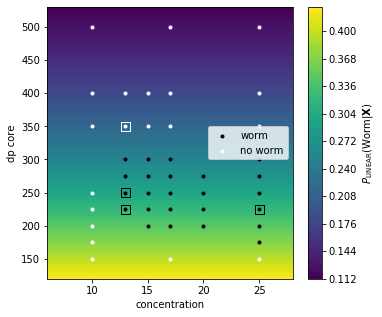

C:\Users\YAL002\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


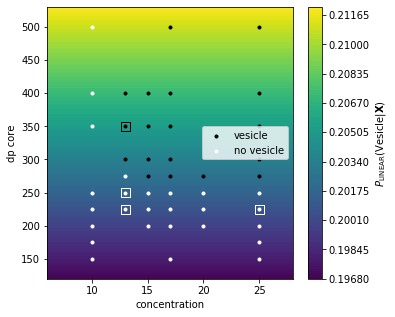

In [16]:
plt.figure(figsize=(5.5,5))
cp = plt.contourf(xx, yy, zz_lr_s, levels=100)
x = points['conc']
y = points['dp_core']

plt.scatter(x[data.sphere==1], y[data.sphere==1], marker='.', color='black', label='sphere')
plt.scatter(x[data.sphere!=1], y[data.sphere!=1], marker='.', color='white', label='no sphere')

points_inc = X_train[query]
x1 = points_inc['conc']
y1 = points_inc['dp_core']
# plt.scatter(x1, y1, facecolor='white', edgecolors='black', marker='s', s=100)
plt.scatter(x1[data.sphere==1], y1[data.sphere==1], facecolor='none', edgecolors='black', marker='s', s=80)
plt.scatter(x1[data.sphere!=1], y1[data.sphere!=1], facecolor='none', edgecolors='white', marker='s', s=80)
    
plt.xlabel('concentration')
plt.ylabel('dp core')
plt.legend()
plt.colorbar(cp, label=r'$P_\mathrm{LINEAR}(\mathrm{Sphere | \mathbf{X}})$')
plt.show()

#########################################################
plt.figure(figsize=(5.5,5))
cp = plt.contourf(xx, yy, zz_lr_w, levels=100)
x = points['conc']
y = points['dp_core']

plt.scatter(x[data.worm==1], y[data.worm==1], marker='.', color='black', label='worm')
plt.scatter(x[data.worm!=1], y[data.worm!=1], marker='.', color='white', label='no worm')

points_inc = X_train[query]
x1 = points_inc['conc']
y1 = points_inc['dp_core']
# plt.scatter(x1, y1, facecolor='white', edgecolors='black', marker='s', s=100)
plt.scatter(x1[data.worm==1], y1[data.worm==1], facecolor='none', edgecolors='black', marker='s', s=80)
plt.scatter(x1[data.worm!=1], y1[data.worm!=1], facecolor='none', edgecolors='white', marker='s', s=80)
    
plt.xlabel('concentration')
plt.ylabel('dp core')
plt.legend()
plt.colorbar(cp, label=r'$P_\mathrm{LINEAR}(\mathrm{Worm | \mathbf{X}})$')
plt.show()

##########################################################
plt.figure(figsize=(5.5,5))
cp = plt.contourf(xx, yy, zz_lr_v, levels=100)
x = points['conc']
y = points['dp_core']

plt.scatter(x[data.vesicle==1], y[data.vesicle==1], marker='.', color='black', label='vesicle')
plt.scatter(x[data.vesicle!=1], y[data.vesicle!=1], marker='.', color='white', label='no vesicle')

points_inc = X_train[query]
x1 = points_inc['conc']
y1 = points_inc['dp_core']
# plt.scatter(x1, y1, facecolor='white', edgecolors='black', marker='s', s=100)
plt.scatter(x1[data.vesicle==1], y1[data.vesicle==1], facecolor='none', edgecolors='black', marker='s', s=80)
plt.scatter(x1[data.vesicle!=1], y1[data.vesicle!=1], facecolor='none', edgecolors='white', marker='s', s=80)
    
plt.xlabel('concentration')
plt.ylabel('dp core')
plt.legend()
plt.colorbar(cp, label=r'$P_\mathrm{LINEAR}(\mathrm{Vesicle | \mathbf{X}})$')
plt.show()

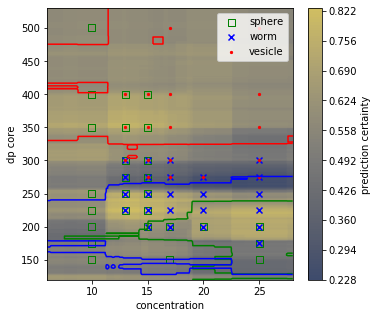

In [17]:
def plot_sample(points):
    x = points['conc']
    y = points['dp_core']
    plt.scatter(x[data.sphere==1], y[data.sphere==1], facecolor='none', edgecolors='green', label='sphere', marker='s', s=50)
    plt.scatter(x[data.worm==1], y[data.worm==1], facecolors='blue', label='worm', marker='x')
    plt.scatter(x[data.vesicle==1], y[data.vesicle==1], facecolors='red', s=20, label='vesicle', marker='.')
    #plt.scatter(x, y, facecolor='none', edgecolors='black', marker='s', s=100)

pp_sphere = rf_sphere.predict_proba(grid_points)[:, 1].reshape(xx.shape)
pp_worm = rf_worm.predict_proba(grid_points)[:, 1].reshape(xx.shape)
pp_vesicle = rf_vesicle.predict_proba(grid_points)[:, 1].reshape(xx.shape)

def plot_phase_diagram(pp_sphere, pp_worm, pp_vesicle):
    certainty = 2*(abs(pp_sphere - 0.5) + abs(pp_worm - 0.5) + abs(pp_vesicle - 0.5))/3
    cp = plt.contourf(xx, yy, certainty, levels=100, cmap='cividis', vmin=0, vmax=1)
    plt.contour(xx, yy, pp_sphere, levels=[0.6], linestyles='-', colors='green')
    plt.contour(xx, yy, pp_vesicle, levels=[0.5], linestyles='-', colors='red')
    plt.contour(xx, yy, pp_worm, levels=[0.5], linestyles='-', colors='blue')
    x = points['conc']
    y = points['dp_core']
    plot_sample(points)
    plt.xlabel('concentration')
    plt.ylabel('dp core')
    plt.legend()
    plt.colorbar(cp, label='prediction certainty')

plt.figure(figsize=(5.5,5))
plot_phase_diagram(pp_sphere, pp_worm, pp_vesicle)
#plt.arrow(11.5, 420, 1, 0, ec='red', fc='red', head_width=6, head_length=0.5, length_includes_head=True)
#plt.arrow(11.3, 235, 1, 0, ec='blue', fc='blue', head_width=6, head_length=0.5, length_includes_head=True)
#plt.arrow(16, 375, -1, 0, ec='green', fc='green', head_width=6, head_length=0.5, length_includes_head=True)
#plt.arrow(22.5, 260, 0, 15, ec='red', fc='red', head_width=0.5, head_length=10, length_includes_head=True)
plt.show()

#print(pp_sphere)
#print(pp_worm)
#print(pp_vesicle)

In [18]:
# pp_sphere = dt_sphere.predict_proba(grid_points)[:, 1].reshape(xx.shape)
# pp_worm = dt_worm.predict_proba(grid_points)[:, 1].reshape(xx.shape)
# pp_vesicle = dt_vesicle.predict_proba(grid_points)[:, 1].reshape(xx.shape)

# plt.figure(figsize=(5.5,5))
# plot_phase_diagram(pp_sphere, pp_worm, pp_vesicle)
# plt.show()

In [19]:
#pp_sphere = gam_sphere.predict_proba(grid_points)[:, 1].reshape(xx.shape)
#pp_worm = gam_worm.predict_proba(grid_points)[:, 1].reshape(xx.shape)
#pp_vesicle = gam_vesicle.predict_proba(grid_points)[:, 1].reshape(xx.shape)

#plt.figure(figsize=(5.5,5))
#plot_phase_diagram(pp_sphere, pp_worm, pp_vesicle)
#plt.show()

C:\Users\YAL002\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: No contour levels were found within the data range.
C:\Users\YAL002\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: No contour levels were found within the data range.


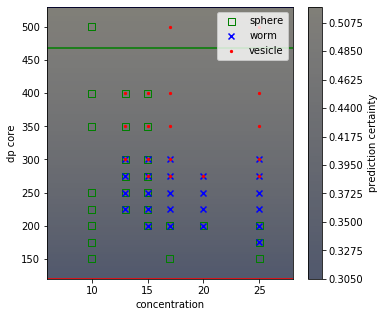

In [20]:
pp_sphere = lr_sphere.predict_proba(grid_points)[:, 1].reshape(xx.shape)
pp_worm = lr_worm.predict_proba(grid_points)[:, 1].reshape(xx.shape)
pp_vesicle = lr_vesicle.predict_proba(grid_points)[:, 1].reshape(xx.shape)

plt.figure(figsize=(5.5,5))
plot_phase_diagram(pp_sphere, pp_worm, pp_vesicle)
plt.show()